###Importing the Sales Dataset

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving combined_data.csv to combined_data.csv


###Reading CSV file

In [ ]:
df = pd.read_csv('combined_data.csv')

In [ ]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


###Dropping Lines with Header repeated

In [ ]:
df.dropna()
df = df.loc[df['Order Date'] != 'Order Date']
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


###Changing Data types

In [ ]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
df['Price Each'] = df['Price Each'].astype(float)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(float)

In [ ]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

###Additing Total Amount Ordered Column

In [ ]:
df['Amount'] = df['Quantity Ordered'] * df['Price Each']

###Which Product has the highest revenue
####*Creating Bar Graph showing products and their revenue*

#####Installing Matplotlib

In [ ]:
pip install matplotlib

####Creating the bar chart

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Getting the sum of the products prices and sorting into descending order for the vertical Bar Chart
#Using the line below we are creating a list. Another option is to create a new data frame and populate the data from here.
prices = df.groupby('Product').sum()['Amount'].sort_values(ascending = True)

#Making the index value of the series into a list
prod = list(prices.index.values)

In [ ]:
print(prices)

Product
AAA Batteries (4-pack)          92740.83
AA Batteries (4-pack)          106118.40
Wired Headphones               246478.43
USB-C Charging Cable           286501.25
Lightning Charging Cable       347094.15
LG Dryer                       387600.00
LG Washing Machine             399600.00
20in Monitor                   454148.71
Vareebadd Phone                827200.00
27in FHD Monitor              1132424.50
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Apple Airpods Headphones      2349150.00
34in Ultrawide Monitor        2355558.01
27in 4K Gaming Monitor        2435097.56
Google Phone                  3319200.00
ThinkPad Laptop               4129958.70
iPhone                        4794300.00
Macbook Pro Laptop            8037600.00
Name: Amount, dtype: float64


In [ ]:
x = prices
y = prod

<BarContainer object of 19 artists>

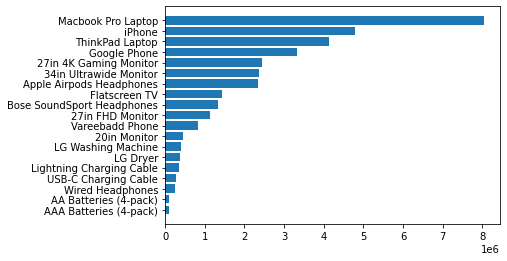

In [ ]:
plt.barh(y, x)